# MendelGWAS.jl

This notebook is designed to be a guide on how to use the package MendelGWAS in Open Mendel to perform a Genome Wide Association Study (GWAS). It will cover performing a GWAS on both qualitative and quantitative tratits (linear and logistic regression). 

The data we will be using is from the Mendel version 16 sample files. The data is described in examples under Option 24 in the Mendel Version 16 Manual [Section 24.4,  page 250](http://www.genetics.ucla.edu/software/Mendel_current_doc.pdf). It consists of simulated data where the traits (binary and quantitative) of interest have two contributing SNPs and an interaction between them.

MendelGWAS requires the following packages to be installed in the following order: SnpArrays.jl, MendelSearch.jl, MendelBase.jl, MendelPlots.jl. If not already done, it can be done through the following commands:

In [ ]:
using Pkg
Pkg.add("https://github.com/OpenMendel/SnpArrays.jl.git")
Pkg.add("https://github.com/OpenMendel/MendelSearch.jl.git")
Pkg.add("https://github.com/OpenMendel/MendelBase.jl.git")
Pkg.add("https://github.com/OpenMendel/MendelPlots.jl.git")

First, add MendelGWAS.jl to your computer if it's not already installed.

In [1]:
Pkg.add("https://github.com/OpenMendel/MendelGWAS.jl.git")

For reproducability information, run versioninfo()

In [2]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-4850HQ CPU @ 2.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, haswell)


MendelGWAS requires a `.txt` file as input with certain fields in order to run the analysis with additional optional fields for further customization and additional analyses.

## Required Arguments:

`pedigree_file` is the file with your covariates. Note: The covariate file must have a row of 1s labeled Person. 

`snpdefinition_file` is the file where your SNPs are defined (snp, chromosome, basepair).

`snpdata_file` is the file with your SNP data.

or alternatively instead of the three above, you can use:

`plink_input_basename` which is the basename of the plink file.

`output_file` is the file that is outputted with the results.

`regression` is the choice of regression.

`regression_formula` is the formula for the regression written in R-like syntax. The left hand side of formula (to the left of `~`) is the trait variable. 

$\hspace{5mm}$

## Optional arguments:

`manhattan_plot_file` is the name of the file for the manhattan plot generated from the analysis. A Manhattan Plot will only be generated if this argument is in the `.txt` file. File name must end in either .png, .svg, or .pdf. 


`qq_plot_file` is the name of the .png file for the QQ plot generated from the analysis result. A QQ will only be generated if this argument is in the `.txt` file. File name must end in either .png, .svg, or .pdf. 

`output_table` is the name of the csv file that contains all SNP information and their pvalues from the GWAS results. 

`lrt_threshold` default is set to 5e-8.

`maf_threshold` default is set to 0.01.

`min_success_rate_per_sample` default is set to 0.98.

`min_success_rate_per_snp`  default is set to 0.98.

`pcs` is the number of Principal Components to calculate and include in the model, default is set to 0.

Ensure your directory is set to the correct location containing all relevant files using:

`;cd path`

$\bf{Qualitative}$ $\bf{GWAS}$

We will first demonstrate using MendelGWAS to perform an analysis with a dichotomous trait such as disease presence or absence. 
You will need to have a `.txt` file that has the required information as well as optional keywords. The example file we will use for the analysis is shown below. 

In [3]:
;cat qualControl.txt

#
# Input and Output files.
#
pedigree_file = gwasped.txt
snpdefinition_file = gwassnpdef.txt
snpdata_file = gwasdata.bed
output_file = qualOutput.txt
manhattan_plot_file = qualManhattanPlotOutput.png
qq_plot_file = qualqq.png
output_table = qualresults.csv
#
# Analysis parameters for GWAS option.
#
regression = logistic
regression_formula = Case_Control ~ Sex + BMI


To run the analysis, simply specify 'Using MendelGWAS' and then enter the commend GWAS("file.txt").

In [4]:
using MendelGWAS
GWAS("qualControl.txt")

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /Users/christophergerman/.julia/packages/Compose/pDFGJ/src/Compose.jl:165
┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /Users/christophergerman/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl.txt
  manhattan_plot_file = qualManhattanPlotOutput.png
  output_file = qualOutput.txt
  output_table = qualresults.csv
  pedigree_file = gwasped.txt
  qq_plot_file = qualqq.png
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 
 
Analyzing the data.



┌ Warning: Indexing with colon as row will create a copy in the future. Use `df[col_inds]` to get the columns without copying
│   caller = gwas_option(::MendelBase.Person, ::MendelBase.SnpDataStruct, ::DataFrames.DataFrame, ::Dict{AbstractString,Any}) at MendelGWAS.jl:247
└ @ MendelGWAS /Users/christophergerman/.julia/packages/MendelGWAS/1kenJ/src/MendelGWAS.jl:247
┌ Warning: Indexing with colon as row will create a copy in the future. Use `df[col_inds]` to get the columns without copying
│   caller = gwas_option(::MendelBase.Person, ::MendelBase.SnpDataStruct, ::DataFrames.DataFrame, ::Dict{AbstractString,Any}) at MendelGWAS.jl:269
└ @ MendelGWAS /Users/christophergerman/.julia/packages/MendelGWAS/1kenJ/src/MendelGWAS.jl:269
┌ Warning: Indexing with colon as row will create a copy in the future. Use `df[col_inds]` to get the columns without copying
│   caller = gwas_option(::MendelBase.Person, ::MendelBase.SnpDataStruct, ::DataFrames.DataFrame, ::Dict{AbstractString,Any}) at MendelGWA

 
Plots being drawn using MendelPlots package.
 
Manhattan plot of GWAS results is in file: qualManhattanPlotOutput.png
 
QQ plot of GWAS results is in file: qualqq.png
 
 
Mendel's analysis is finished.



Now to check on the results. They are stored in the designated output file in the same directory. The file contains the base model information as well as significant SNPs and relevant information for them. In the Analysis, there were 2 SNPs detected to be potentially significant (p-value < 0.05/number of snps), so only their output is included in the output file. 

In [5]:
;cat qualOutput.txt

 
Summary for Base Model with Formula: Case_Control ~ Sex + BMI
Regression model: logistic
Link function: canonical
Base components' effect estimates: 
   (Intercept) : -0.699975
   Sex : 0.0132831
   BMI : -0.00875774
Base model loglikelihood: -1315.0784
 
 

Summary for SNP rs1935681
 on chromosome 6 at basepair 112651205
SNP p-value: 1.515e-9
Minor allele frequency: 0.2523
Hardy-Weinberg p-value: 0.3666
SNP effect estimate: 0.4831
SNP model loglikelihood: -1296.8209
 

Summary for SNP rs2256412
 on chromosome 12 at basepair 41913108
SNP p-value: 6.68e-21
Minor allele frequency: 0.4741
Hardy-Weinberg p-value: 0.1844
SNP effect estimate: 0.6371
SNP model loglikelihood: -1271.0984
 
 
 
        P-value   Number of Passing
FDR    Threshold     Predictors 

0.01    0.00000           2
0.05    0.00000           2
0.10    0.00000           2
0.20    0.00000           2
0.30    0.00000           2
0.40    0.00000           2
0.50    0.00000           2
0.60    0.00044           8
0.70    0.

To view the output file that was generated: 

In [6]:
;head qualresults.csv

SNP,Chromosome,BasePair,Pvalue,NegLog10Pvalue
rs3934834,1,1005805,0.7563277049400371,0.12128999072883717
rs6603793,1,1505254,0.8685887471231099,0.061185801377192435
rs2843153,1,2245220,0.2878278863416084,0.5408671315336122
rs7535528,1,2444413,0.32797229375701864,0.48416284280256167
rs12046158,1,2891712,0.18377742614762207,0.7357078351784448
rs2817134,1,3098714,0.7345730341301177,0.13396501846750467
rs4494089,1,3254355,0.6061077172766064,0.21745018629306131
rs4648505,1,3405295,0.4027894996634027,0.3949218596121692
rs1181883,1,3677932,0.7097702689879541,0.14888219642953585


For benchmarking purposes, to see the analysis runtime (excluding plots): 

In [7]:
using BenchmarkTools
@benchmark GWAS("qualControl2.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl2.txt
  output_file = qualOutput.txt
  output_table = qualresults.csv
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwassnpdef.txt
 
 
Analyzing the data.

 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  control_file = qualControl2.txt
  output_file = qualOutput.txt
  output_table = qualresults.csv
  pedigree_file = gwasped.txt
  regression = logistic
  regression_formula = Case_Control ~ Sex + BMI
  snpdata_file = gwasdata.bed
  snpdefiniti

BenchmarkTools.Trial: 
  memory estimate:  1.53 GiB
  allocs estimate:  1380717
  --------------
  minimum time:     3.591 s (24.03% GC)
  median time:      3.663 s (22.73% GC)
  mean time:        3.663 s (22.73% GC)
  maximum time:     3.736 s (21.49% GC)
  --------------
  samples:          2
  evals/sample:     1

A Manhattan Plot was generated from the analysis, this gives you a clear way to visualize where the significant hits are coming from and if any other SNPs were close to hitting the potentially significant boundary. The QQ plot was also generated, showing you the genomic inflation factor and the spread of the values. 

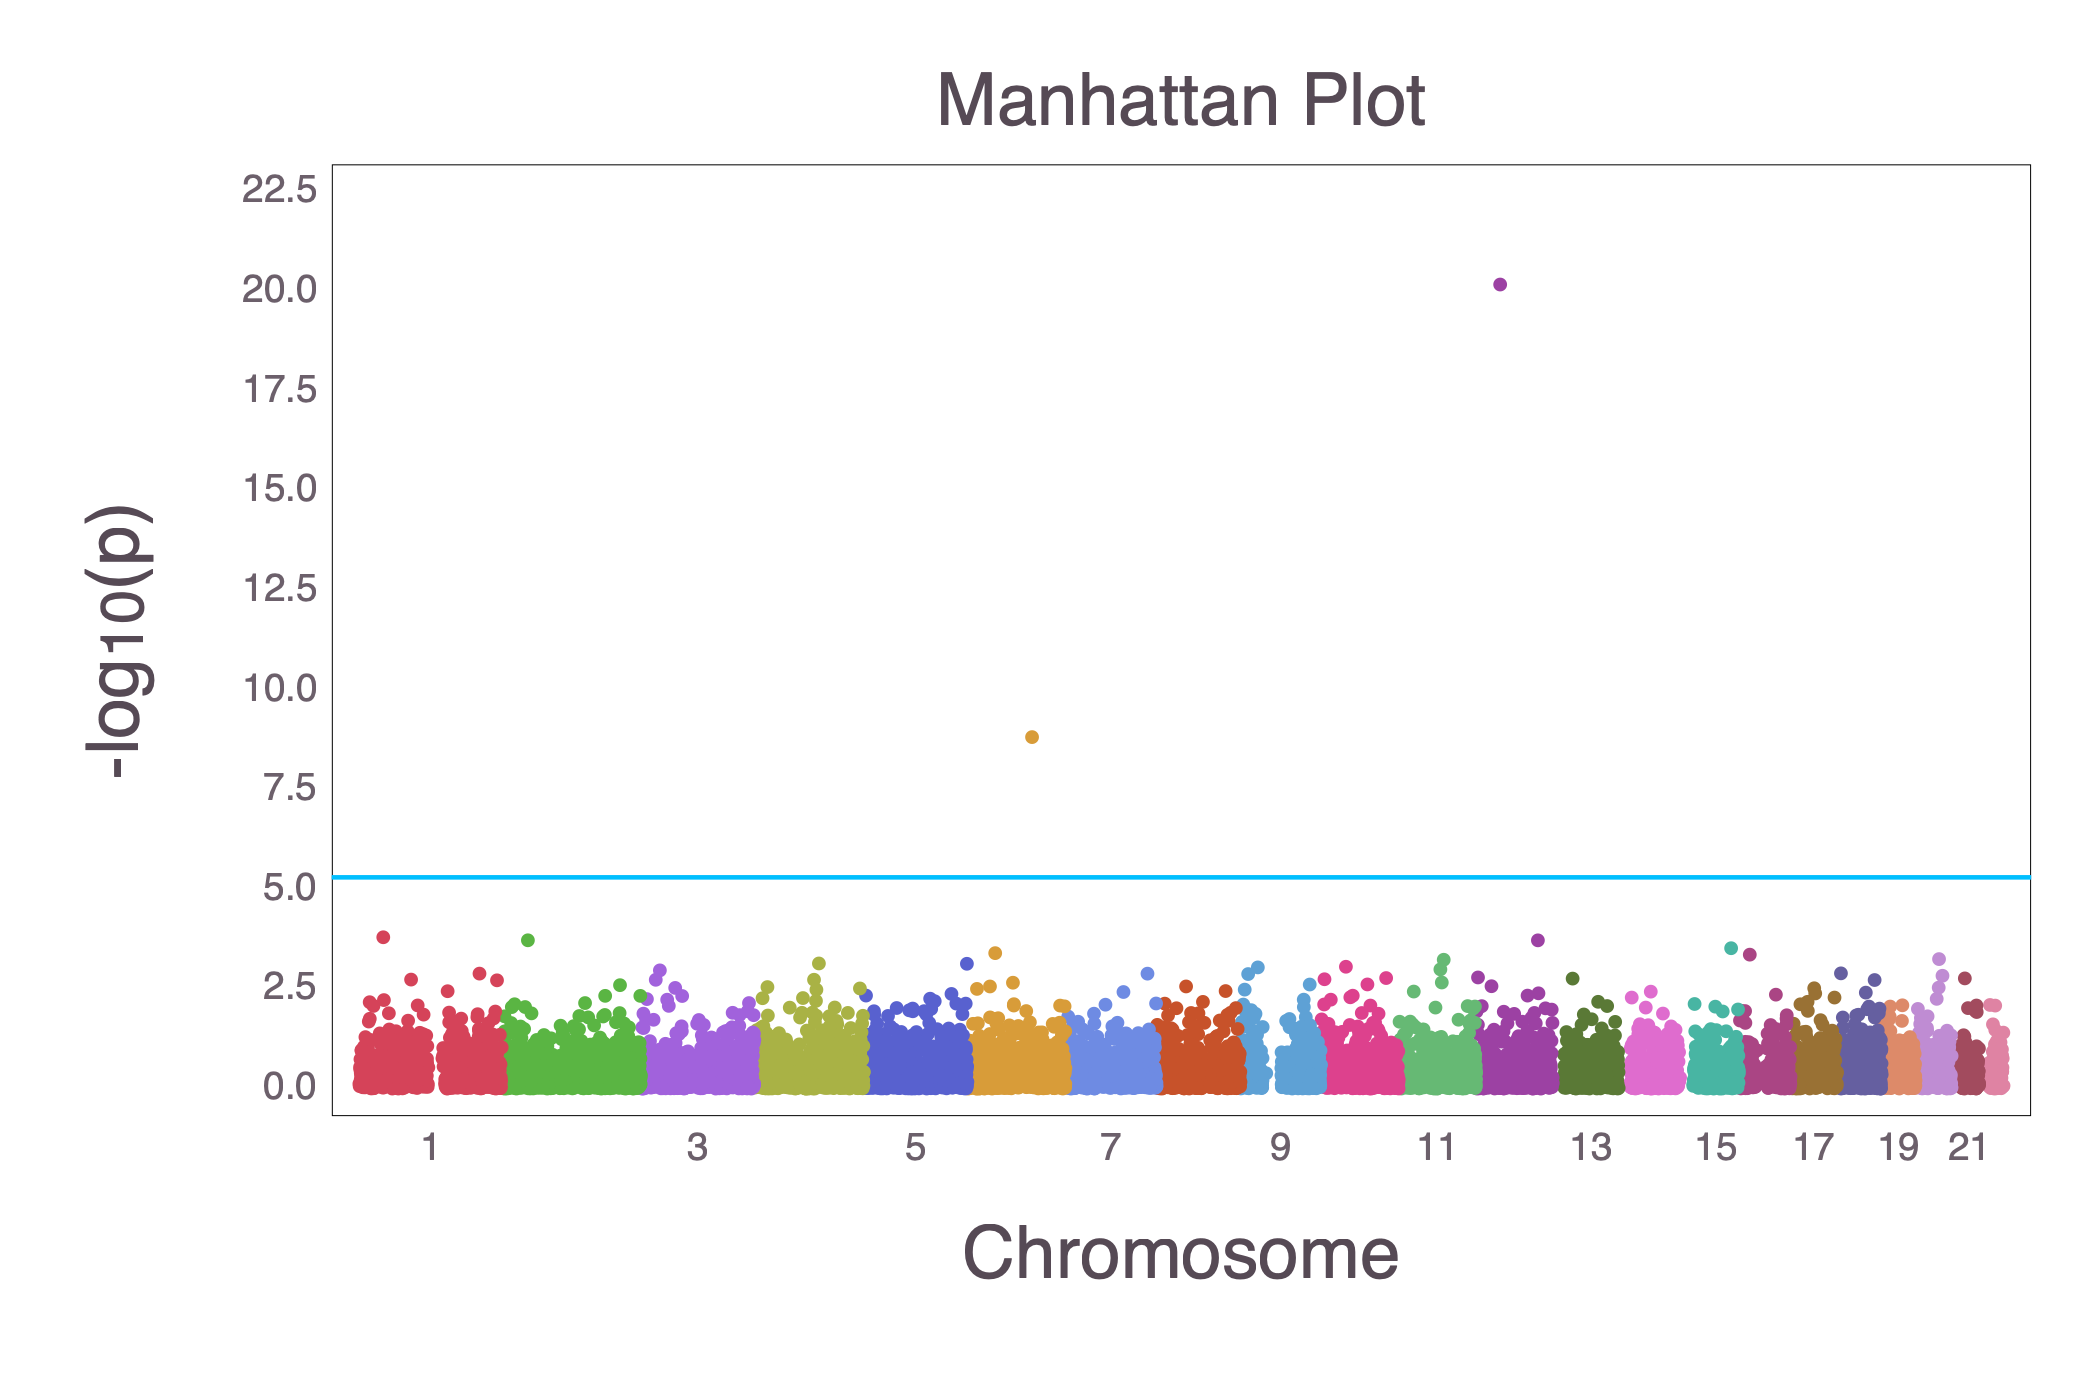

In [8]:
display("image/png", read("qualManhattanPlotOutput.png"))

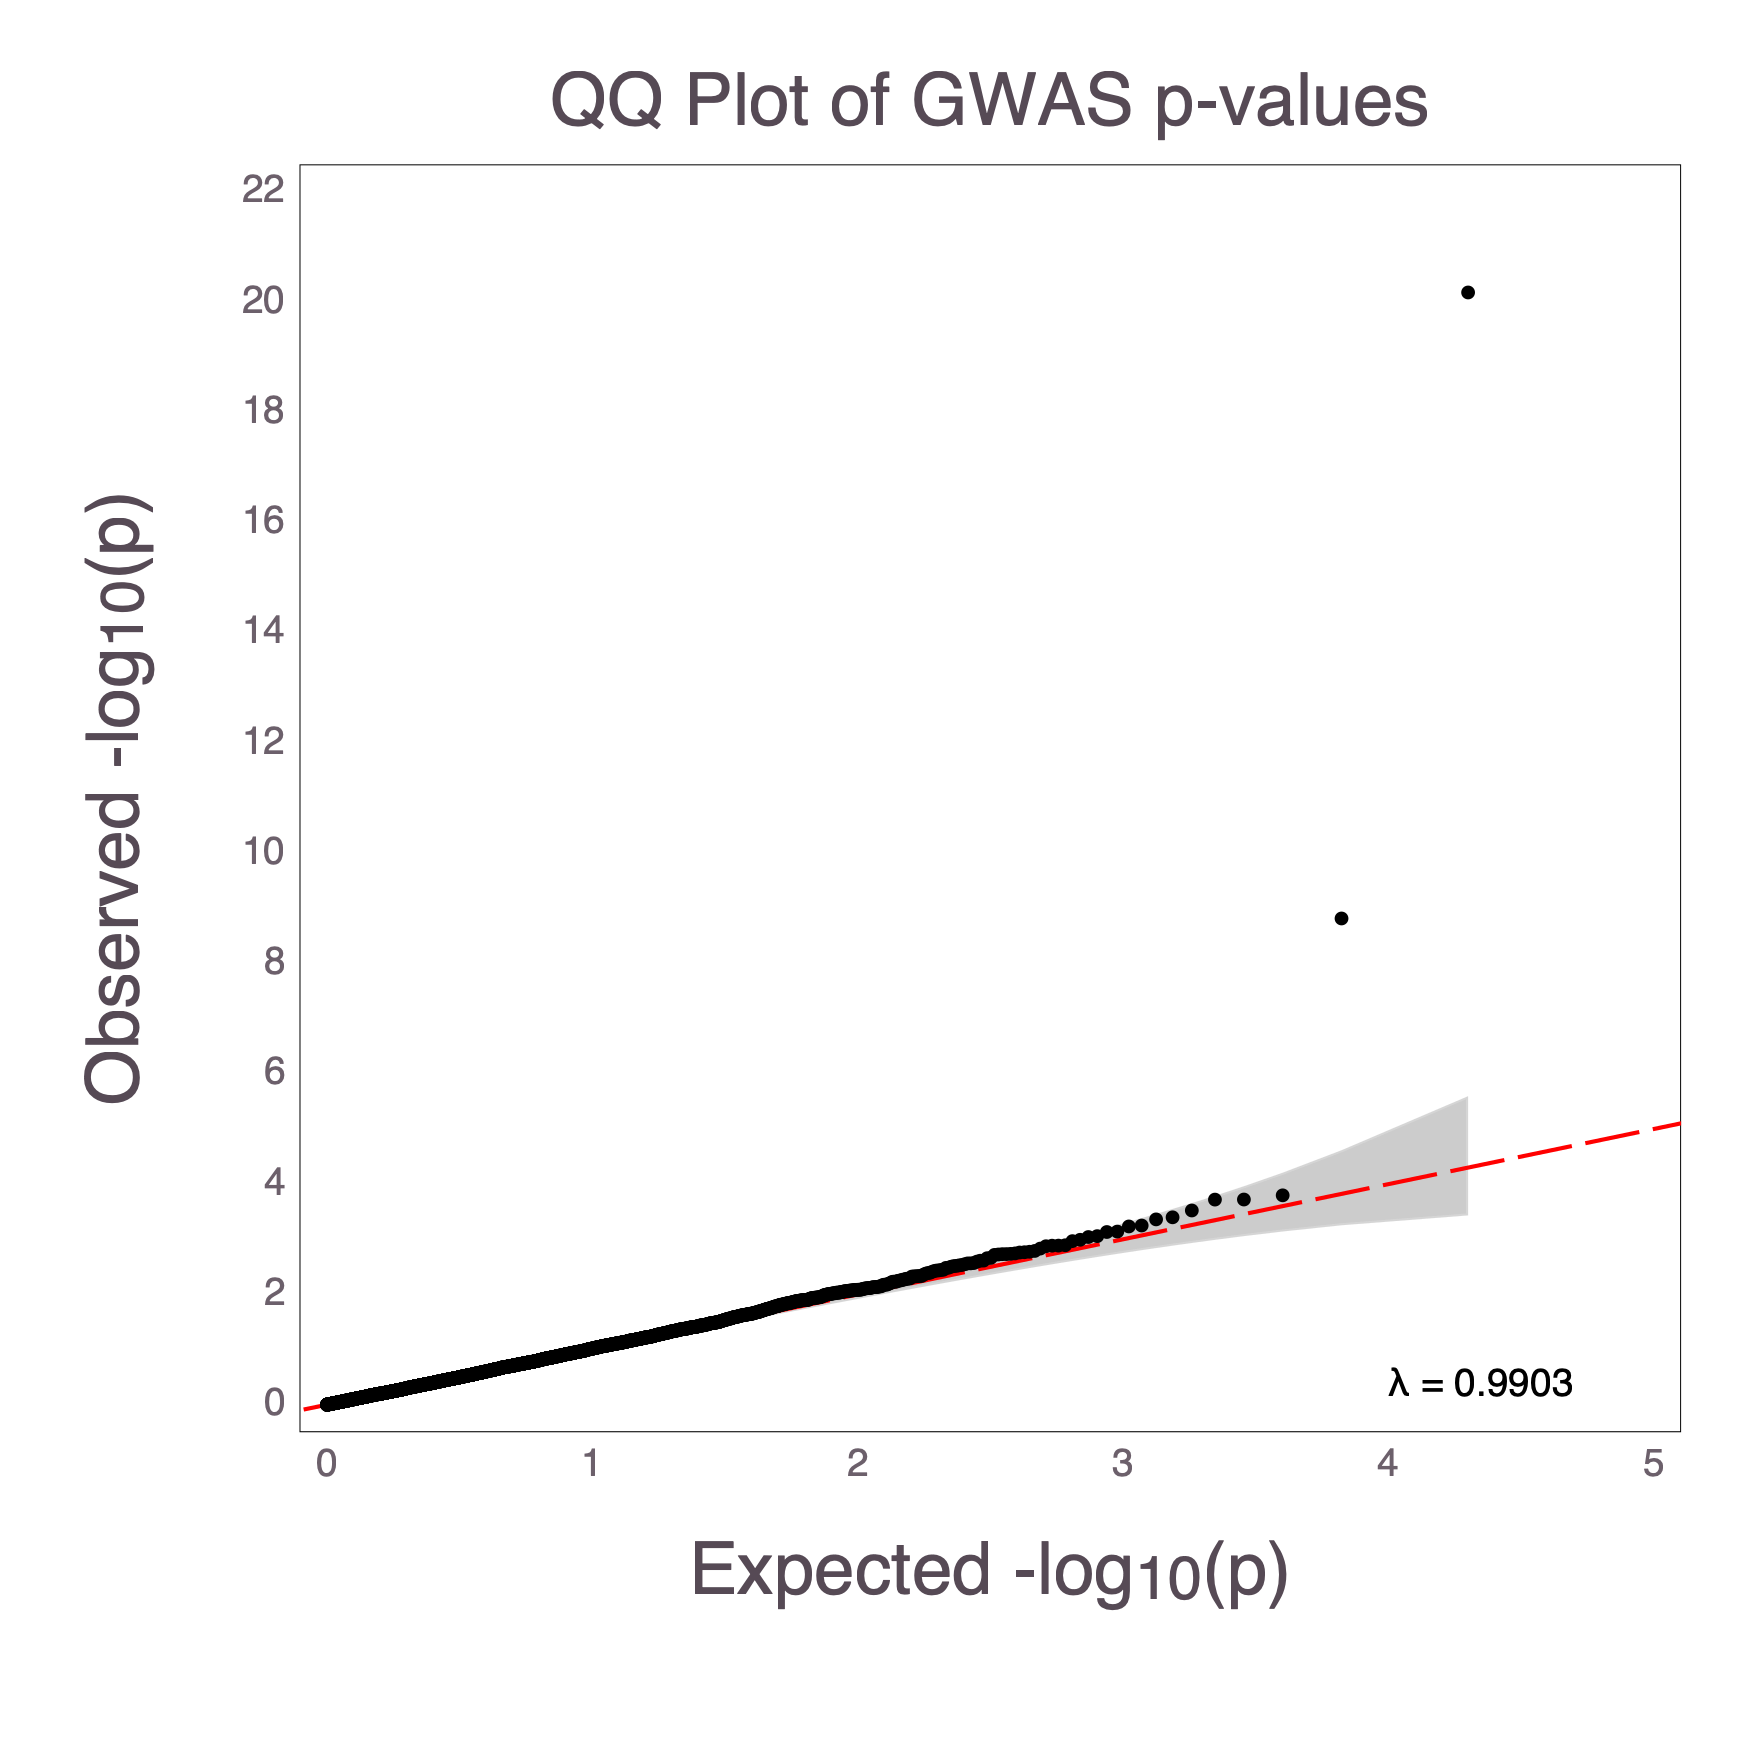

In [9]:
display("image/png", read("qualqq.png"))

$\bf{Quantitative}$ $\bf{GWAS}$

We will now run the analysis on the same SNP dataset, but using a quantitative trait variable instead. For the quantiative analysis, we need to specific the quantitative variable on the left hand side in the

`regression_formula` section of the .txt file (in our example, Trait).

You also must specify the regression as linear instead of logistic on the 
   
`regression` argument in the .txt file. 

In [10]:
;cat quantControl.txt

#
# Input and Output files.
#
plink_input_basename = gwasdata
output_file = quantOutput.txt
manhattan_plot_file = quantgwasManhattanPlotOutput.png
qq_plot_file = quantqq.png
output_table = quantresults.csv
#
# Analysis parameters for GWAS option.
#
regression = linear
regression_formula = Trait ~ Sex


In [11]:
using MendelGWAS
GWAS("quantControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  output_table = quantresults.csv
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  qq_plot_file = quantqq.png
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 
 
Analyzing the data.

 
Plots being drawn using MendelPlots package.
 
Manhattan plot of GWAS results is in file: quantgwasManhattanPlotOutput.png
 
QQ plot of GWAS results is in file: quantqq.png
 
 
Mendel's analysis is finished.



We can check the output `.txt` file from the analysis. You can see that two SNPs had pvalues under the threshold, so their relevant information is displayed in the .txt file generated along with the regression results. 

In [12]:
;cat quantOutput.txt

 
Summary for Base Model with Formula: Trait ~ Sex
Regression model: linear
Link function: canonical
Base components' effect estimates: 
   (Intercept) : 0.142482
   Sex : -0.0129378
Base model loglikelihood: -1258.177
 
 

Summary for SNP rs1935681
 on chromosome 6 at basepair 112651205
SNP p-value: 1.124e-11
Minor allele frequency: 0.2523
Hardy-Weinberg p-value: 0.3666
SNP effect estimate: 0.2496
SNP model loglikelihood: -1235.1273
Proportion of base-model variance explained: 0.02074
 

Summary for SNP rs2256412
 on chromosome 12 at basepair 41913108
SNP p-value: 1.431e-34
Minor allele frequency: 0.4741
Hardy-Weinberg p-value: 0.1844
SNP effect estimate: 0.3857
SNP model loglikelihood: -1182.9861
Proportion of base-model variance explained: 0.06607
 
 
 
        P-value   Number of Passing
FDR    Threshold     Predictors 

0.01    0.00000           2
0.05    0.00000           2
0.10    0.00000           2
0.20    0.00009           5
0.30    0.00021           8
0.40    0.00048        

To view the output file containing all SNPs and pvalues that was generated:

In [13]:
;head quantresults.csv

SNP,Chromosome,BasePair,Pvalue,NegLog10Pvalue
rs3934834,1,1005805,0.9606754090532998,0.017423326035240563
rs6603793,1,1505254,0.909143741049904,0.041367446800497865
rs2843153,1,2245220,0.24546946624591717,0.6100025217308951
rs7535528,1,2444413,0.5375925995318912,0.26954671838537847
rs12046158,1,2891712,0.22439535221836035,0.6489861426334482
rs2817134,1,3098714,0.3644891511102743,0.43831539377415935
rs4494089,1,3254355,0.6866418028528727,0.16326976019414963
rs4648505,1,3405295,0.09446386482644703,1.0247342899845668
rs1181883,1,3677932,0.8758193397571711,0.05758546898965092


For benchmarking purposes, and to look at the total time of the analysis after precompliation (including generating QQplot and Manhattan Plot)

In [14]:
using BenchmarkTools
@benchmark GWAS("quantControl.txt")

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/christophergerman/OpenMendelGWAS".

Keywords modified by the user:

  affected_designator = 2
  control_file = quantControl.txt
  manhattan_plot_file = quantgwasManhattanPlotOutput.png
  output_file = quantOutput.txt
  output_table = quantresults.csv
  pedigree_file = gwasdata.fam
  plink_input_basename = gwasdata
  qq_plot_file = quantqq.png
  regression = linear
  regression_formula = Trait ~ Sex
  snpdata_file = gwasdata.bed
  snpdefinition_file = gwasdata.bim
 
 
Analyzing the data.

 
Plots being drawn using MendelPlots package.
 
Manhattan plot of GWAS results is in file: quantgwasManhattanPlotOutput.png
 
QQ plot of GWAS results is in file: quantqq.png
 
 
Mendel's analysis is finished.

 
 
     Welcome to OpenMendel's
      GWAS analysis option
        version 0.5.0
 
 
Reading the data.

The current working directory is "/Users/chri

BenchmarkTools.Trial: 
  memory estimate:  1.06 GiB
  allocs estimate:  8868223
  --------------
  minimum time:     3.407 s (13.65% GC)
  median time:      3.515 s (15.16% GC)
  mean time:        3.515 s (15.16% GC)
  maximum time:     3.623 s (16.57% GC)
  --------------
  samples:          2
  evals/sample:     1

A Manhattan Plot was generated from the analysis, this gives you a clear way to visualize where the significant hits are coming from and if any other SNPs were close to hitting the potentially significant boundary. The QQ plot was also generated, showing you the genomic inflation factor and the spread of the values. 

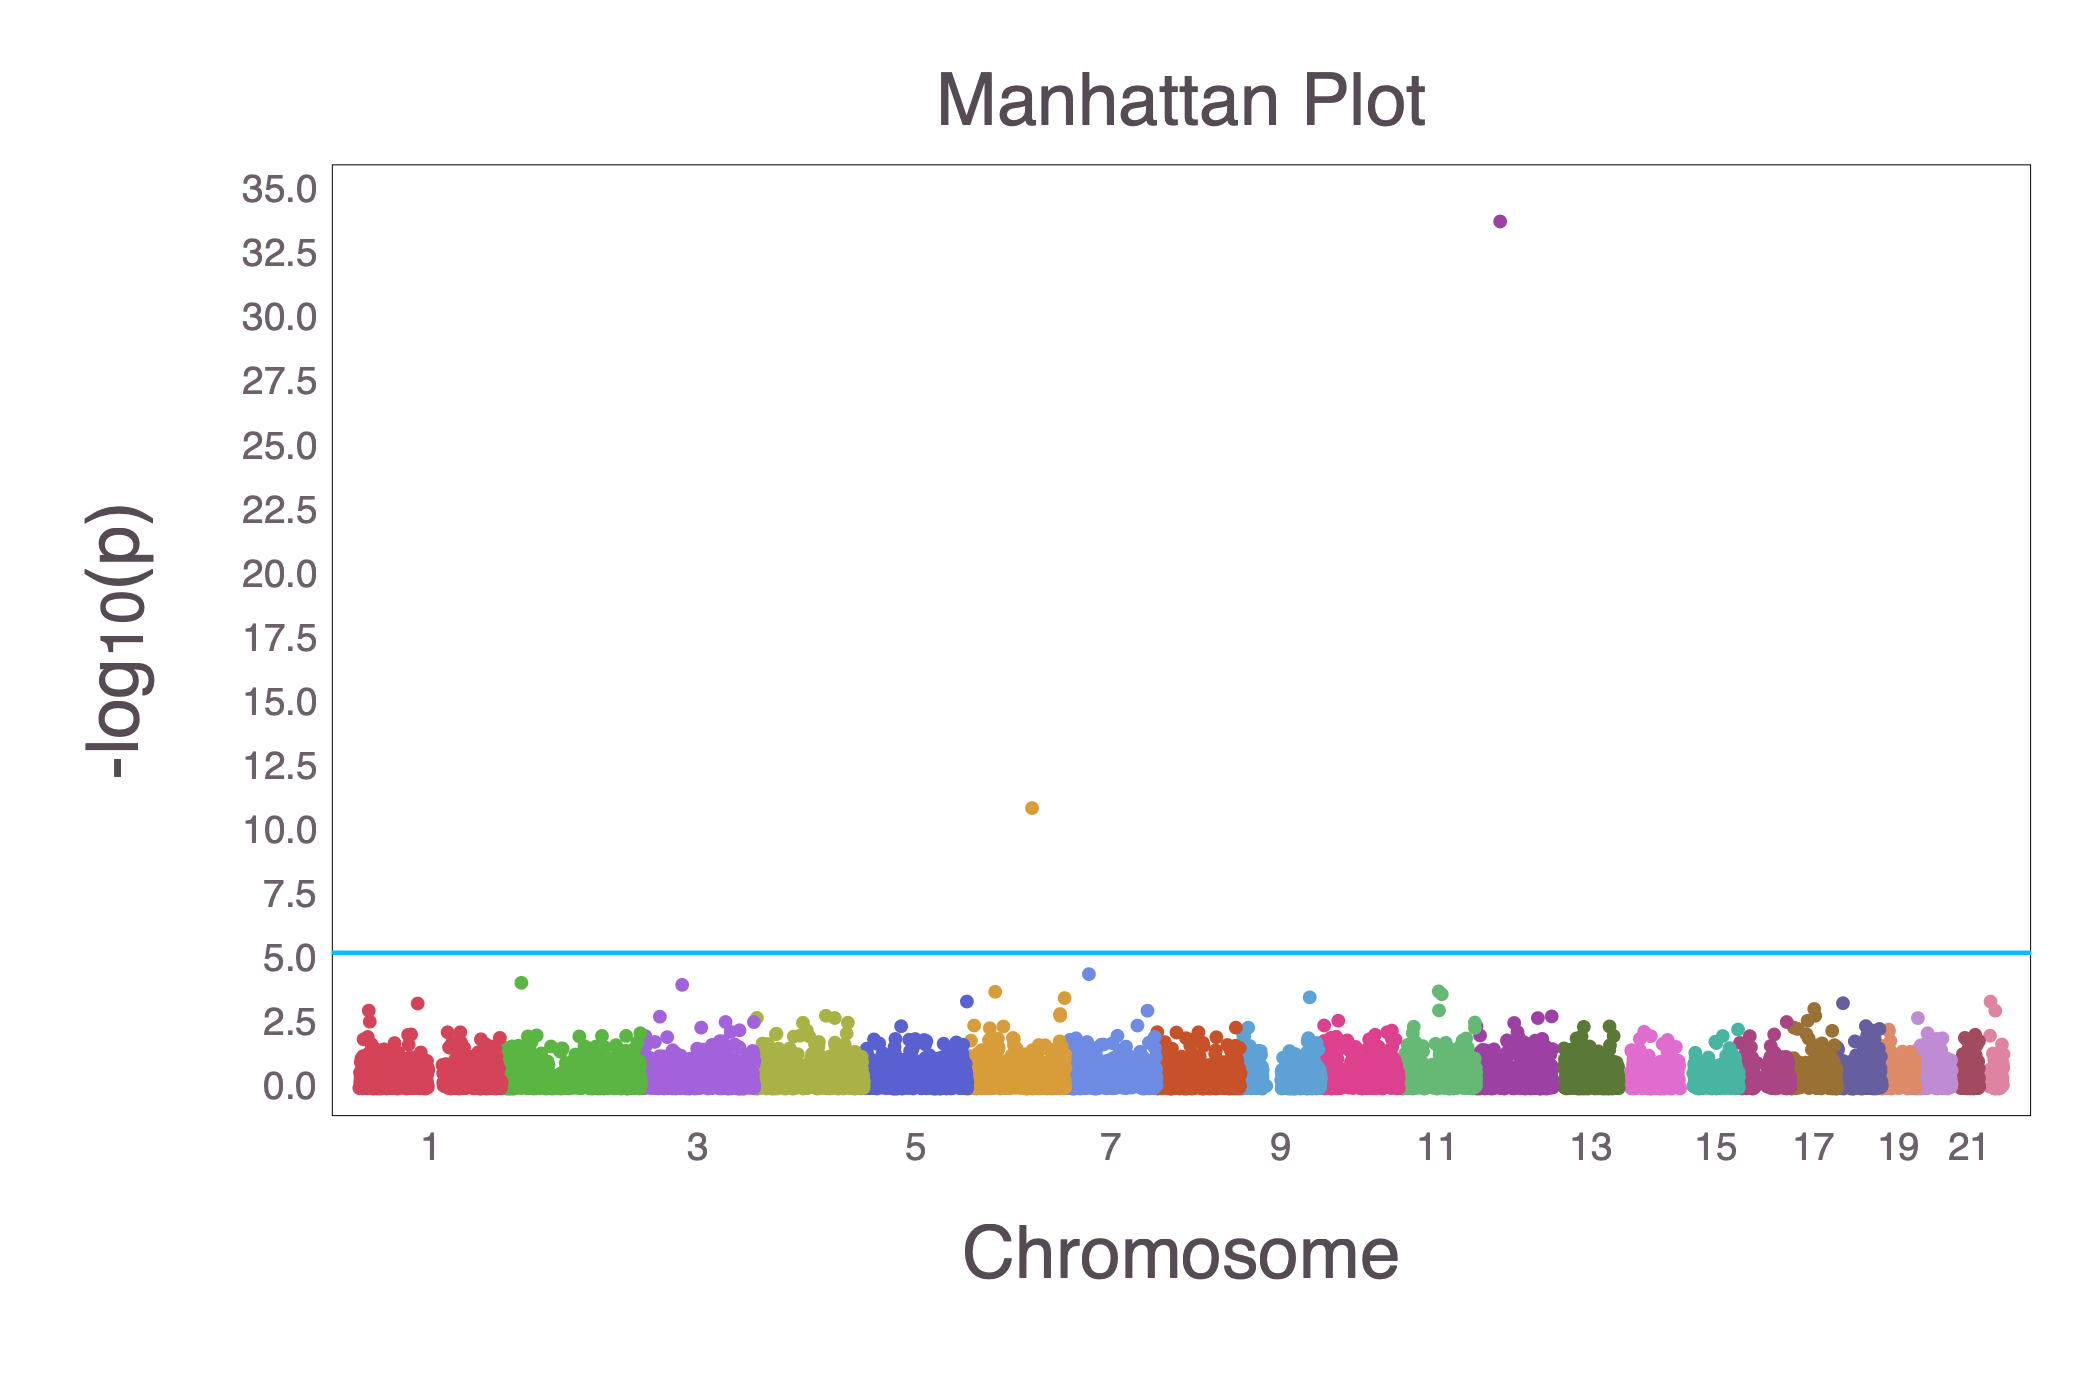

In [15]:
display("image/png", read("quantgwasManhattanPlotOutput.png"))

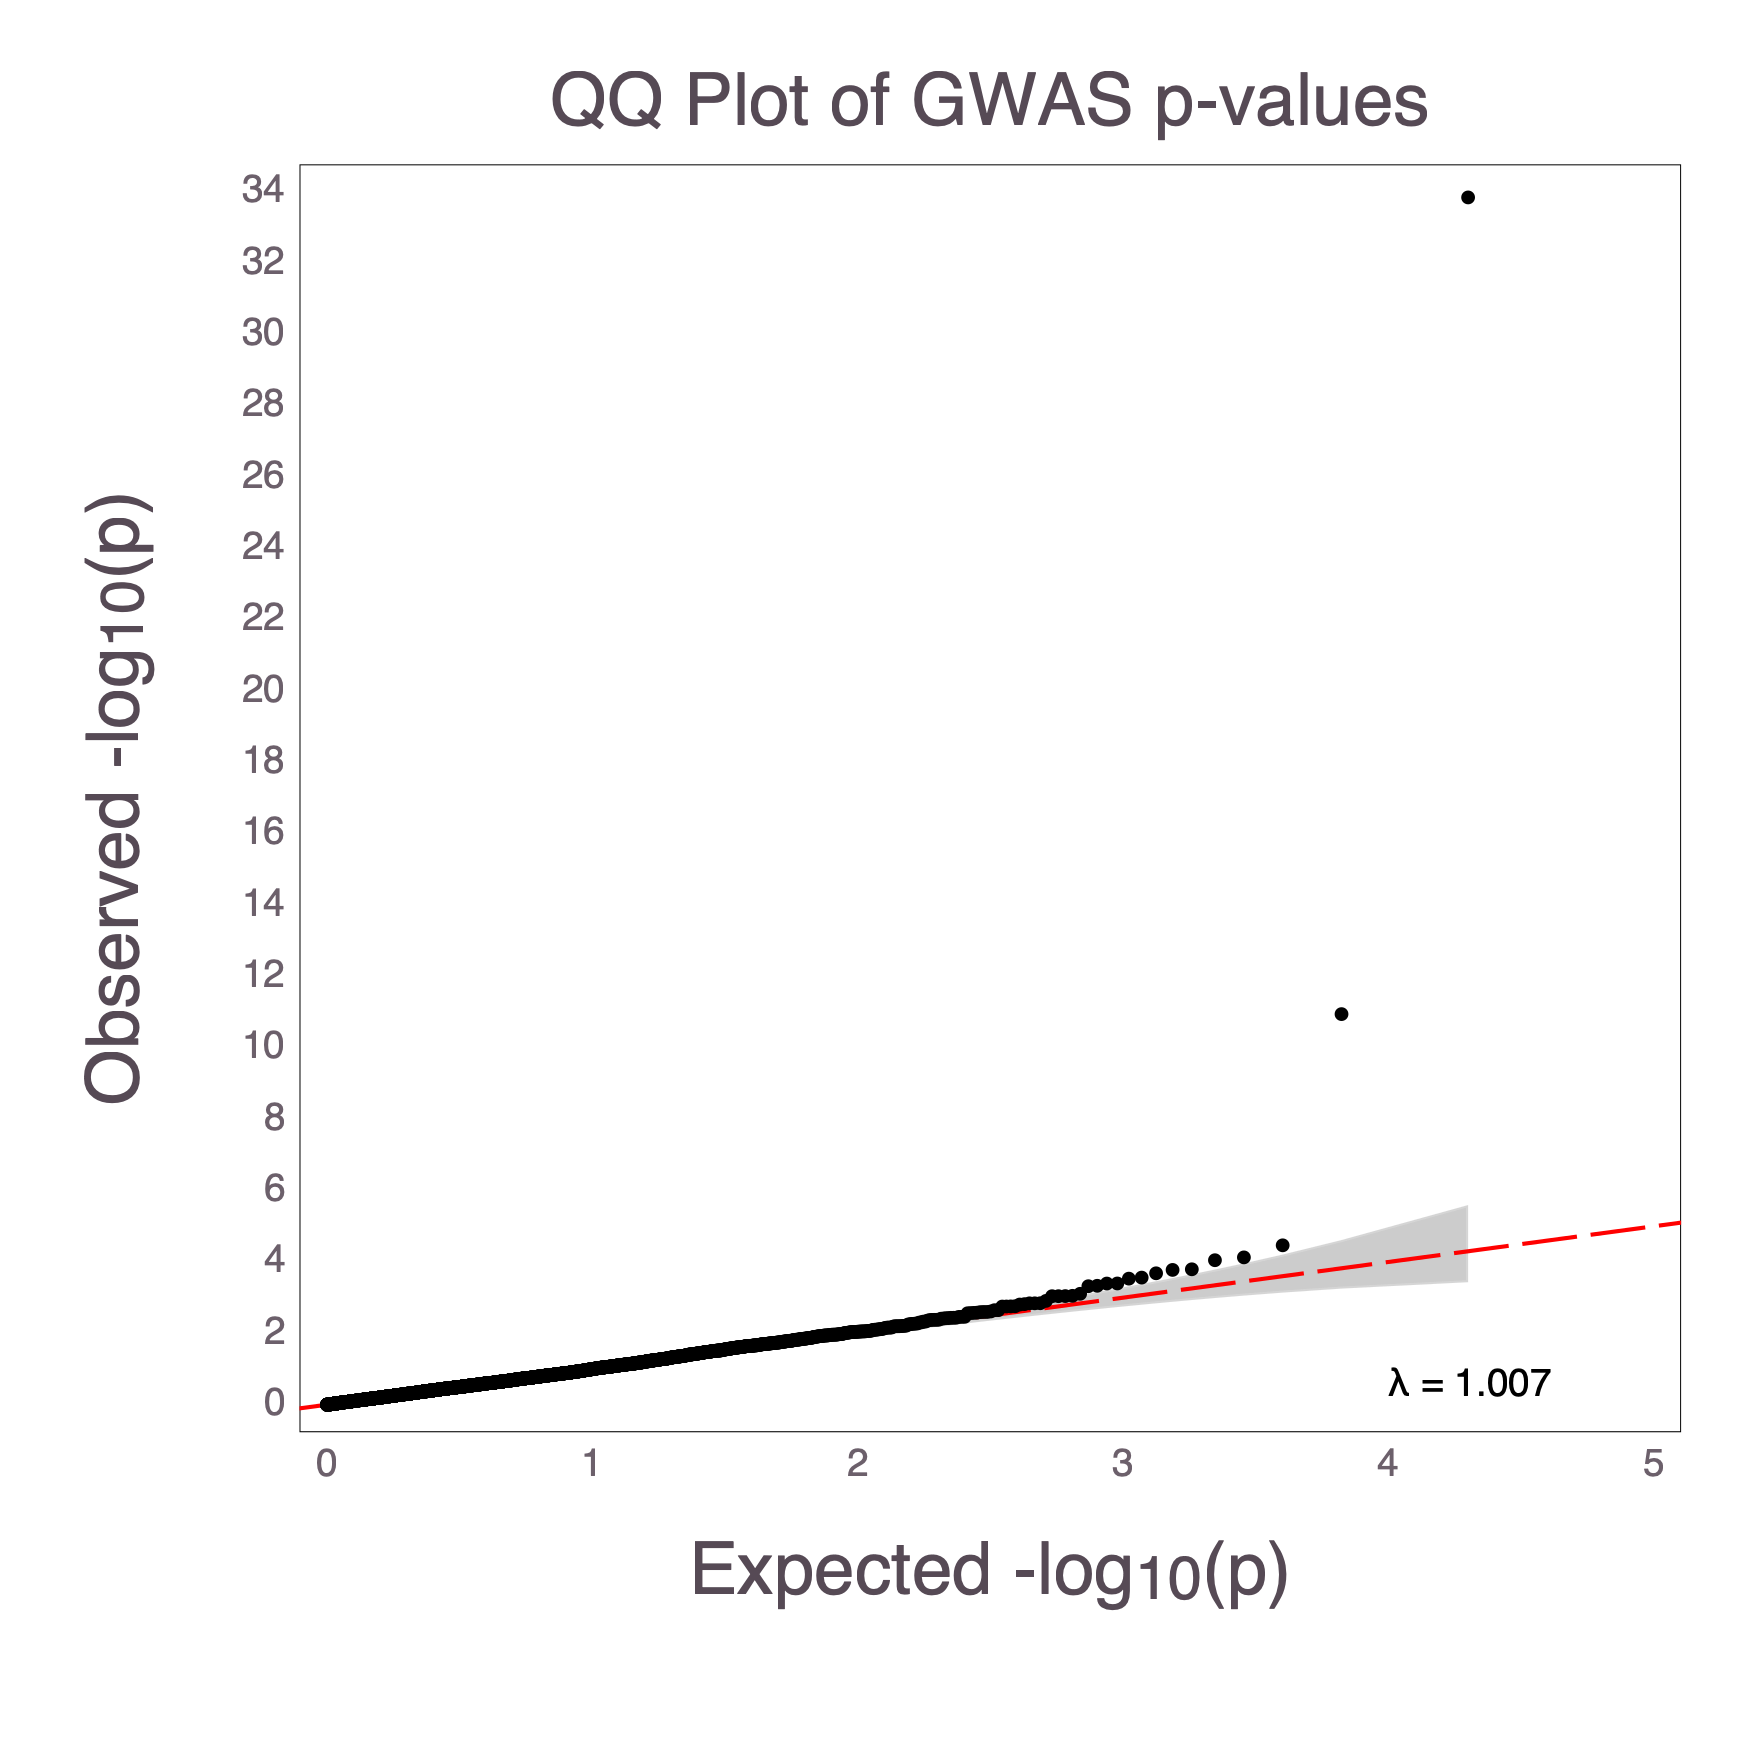

In [16]:
display("image/png", read("quantqq.png"))